# Random Imputation for Numerical Column

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('D:/Personal Projects/Missing/2_train/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.shape

(891, 3)

In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
(177/891)*100               # AGE 

19.865319865319865

In [9]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [10]:
x = df.drop('Survived', axis=1)

In [11]:
y = df['Survived']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=2)

In [13]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [14]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [15]:
# x_train['Age_imputed'] x_train['Age_imputed'].isnull()

In [16]:
#  x_train['Age_imputed'].isnull()

30     False
10     False
873    False
182    False
876    False
       ...  
534    False
584     True
493    False
527     True
168     True
Name: Age_imputed, Length: 712, dtype: bool

In [17]:
#  [ x_train['Age_imputed'].isnull() ]

[30     False
 10     False
 873    False
 182    False
 876    False
        ...  
 534    False
 584     True
 493    False
 527     True
 168     True
 Name: Age_imputed, Length: 712, dtype: bool]

In [18]:
# x_train['Age_imputed'][ x_train['Age_imputed'].isnull() ]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [19]:
# print(type( x_train['Age_imputed'][ x_train['Age_imputed'].isnull() ] ))

In [20]:
# print(type( x_train['Age_imputed'].isnull()))

In [21]:
# print(type(  x_train['Age_imputed'].isnull() ))

In [22]:
# x_train['Age'].dropna().sample( 1 ).values

In [23]:
# x_train['Age'].dropna().sample( x_train['Age'].isnull().sum() ).values

In [24]:
# x_train['Age'].dropna().sample( x_train['Age'].isnull().sum() ).values.shape

In [25]:
# x_train['Age'].isnull().sum()                   

In [26]:
# x_train['Age'].isnull()

In [27]:
# 712-148               # 564   

In [28]:
# x_train['Age'].notnull().sum()        # 564

In [29]:
x_train['Age_imputed'][ x_train['Age_imputed'].isnull() ]=x_train['Age'].dropna().sample( x_train['Age'].isnull().sum() ).values

In [30]:
x_test['Age_imputed'][ x_test['Age_imputed'].isnull() ] =x_test['Age'].dropna().sample( x_test['Age'].isnull().sum() ).values

In [31]:
# x_train['Age'].dropna().sample( x_train['Age'].isnull().sum() ).values.shape

In [32]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,16.0
493,71.0,49.5042,71.0
527,NaN,221.7792,23.0


C:\Users\nw00790817\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nw00790817\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


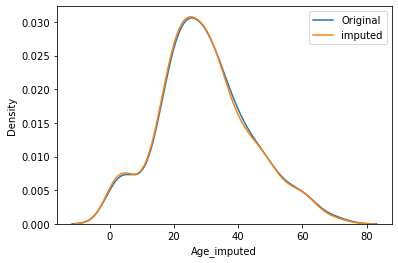

In [33]:
sns.distplot(x_train['Age'], label='Original', hist=False)
sns.distplot(x_train['Age_imputed'], label='imputed', hist=False)

plt.legend()
plt.show()

In [34]:
print('Original variable variance :', x_train['Age'].var() )
print('Variance after random imputation :', x_train['Age_imputed'].var() )

Original variable variance : 204.3495133904614
Variance after random imputation : 203.607030706672


In [35]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,54.318194
Age,71.512440,204.349513,204.349513
Age_imputed,54.318194,204.349513,203.607031


<AxesSubplot:>

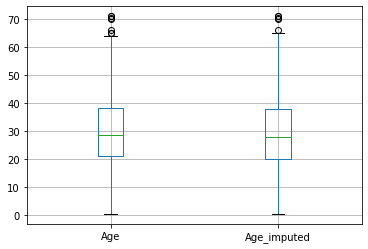

In [36]:
x_train[['Age', 'Age_imputed']].boxplot()

### if Input Fare First = 50   ,     random Age = 40

### if Input Fare Second = 50   ,    random Age = must be 40  from the random Imputation

In [37]:
# sampled_value = x_train['Age'].dropna().sample( 1, random_state=int(observation['Fare']) ) 

# Random Imputation for Categorical Column

In [38]:
data = pd.read_csv('D:/Personal Projects/Missing/house-train.csv', usecols=['GarageQual', 'FireplaceQu','SalePrice'] )

In [39]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [40]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [41]:
x = data
y = data['SalePrice']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=2)

In [43]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']


x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [44]:
x_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
812,NaN,TA,55993,TA,NaN
1354,TA,TA,235000,TA,TA
478,Gd,TA,297000,TA,Gd
480,Gd,TA,326000,TA,Gd
1148,Gd,TA,116900,TA,Gd


In [45]:
x_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [46]:
x_train['GarageQual_imputed'] [ x_train['GarageQual_imputed'].isnull() ] = x_train.dropna().sample( x_train['GarageQual'].isnull().sum() ).values

x_test['GarageQual_imputed'] [ x_test['GarageQual_imputed'].isnull() ] = x_test.dropna().sample( x_test['GarageQual'].isnull().sum() ).values

C:\Users\NW0079~1\AppData\Local\Temp/ipykernel_16352/3755391026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['GarageQual_imputed'] [ x_train['GarageQual_imputed'].isnull() ] = x_train.dropna().sample( x_train['GarageQual'].isnull().sum() ).values
C:\Users\NW0079~1\AppData\Local\Temp/ipykernel_16352/3755391026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['GarageQual_imputed'] [ x_test['GarageQual_imputed'].isnull() ] = x_test.dropna().sample( x_test['GarageQual'].isnull().sum() ).values


In [47]:
x_train['FireplaceQu_imputed'] [ x_train['FireplaceQu_imputed'].isnull() ] = x_train.dropna().sample( x_train['FireplaceQu'].isnull().sum() ).values

x_test['FireplaceQu_imputed'] [ x_test['FireplaceQu_imputed'].isnull() ] = x_test.dropna().sample( x_test['FireplaceQu'].isnull().sum() ).values

C:\Users\NW0079~1\AppData\Local\Temp/ipykernel_16352/3937622983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['FireplaceQu_imputed'] [ x_train['FireplaceQu_imputed'].isnull() ] = x_train.dropna().sample( x_train['FireplaceQu'].isnull().sum() ).values
C:\Users\NW0079~1\AppData\Local\Temp/ipykernel_16352/3937622983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['FireplaceQu_imputed'] [ x_test['FireplaceQu_imputed'].isnull() ] = x_test.dropna().sample( x_test['FireplaceQu'].isnull().sum() ).values


## GarageQual (Only 5.547945 % Data is Missing)

In [48]:
temp = pd.concat(
    [
    x_train['GarageQual'].value_counts() / len( x_train['GarageQual'].dropna() ),
    x_train['GarageQual_imputed'].value_counts() / len(x_train)
    ], axis=1 )

temp.columns=['Original', 'imputed']

In [49]:
temp

,Original,imputed
TA,0.951043,0.927226
Fa,0.037171,0.036815
Gd,0.009973,0.023973
Po,0.000907,0.000856
Ex,0.000907,0.000856
222500,NaN,0.001712
176000,NaN,0.001712
151000,NaN,0.000856
263000,NaN,0.000856
239900,NaN,0.000856


## FireplaceQu ( 47.260274 % Data is Missing)

In [50]:
temp = pd.concat(
    [
    x_train['FireplaceQu'].value_counts() / len( x_train['FireplaceQu'].dropna() ),
    x_train['FireplaceQu_imputed'].value_counts() / len( x_train)
    ], axis=1 )

temp.columns=['Original', 'imputed']

In [51]:
temp

,Original,imputed
Gd,0.494272,0.363870
TA,0.412439,0.471747
Fa,0.040917,0.029966
Po,0.027823,0.017979
Ex,0.024550,0.019692
...,...,...
187000,NaN,0.000856
244000,NaN,0.000856
183500,NaN,0.000856
123000,NaN,0.000856


In [52]:
x_train['FireplaceQu'].dropna().unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [53]:
x_train['FireplaceQu'].shape

(1168,)

In [59]:
x_train['FireplaceQu']==category

455     False
863     False
504     False
1413    False
1389    False
        ...  
466     False
299     False
493     False
527     False
1192    False
Name: FireplaceQu, Length: 1168, dtype: bool

### Python | Data comparison and selection in pandas

In [ ]:
# https://www.geeksforgeeks.org/python-data-comparison-and-selection-in-pandas/    

In [60]:
x_train[ x_train['FireplaceQu']==category]

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed


In [61]:
x_train[ x_train['FireplaceQu']==category] ['SalePrice']

Series([], Name: SalePrice, dtype: int64)

C:\Users\nw00790817\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nw00790817\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nw00790817\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

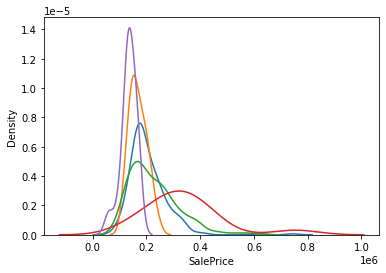

In [57]:
for category in  x_train['FireplaceQu'].dropna().unique():
    sns.distplot( x_train[ x_train['FireplaceQu'] == category] ['SalePrice'], hist=False, label=category)
    
plt.show()    

C:\Users\nw00790817\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nw00790817\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nw00790817\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

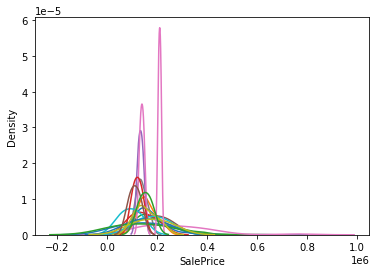

In [58]:
for category in  x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot( x_train[ x_train['FireplaceQu_imputed']==category] ['SalePrice'], hist=False, label=category)
    
plt.show()   